In [7]:
lya_data_path = "../data/lyman-alpha.txt" 
import matplotlib
from matplotlib import pyplot as plt 
import numpy as np

In [8]:
class Data(object):
    def __init__(self, x, y, y_unc):
        self.x = x
        self.y = y
        self.y_unc = y_unc

In [9]:
def load_lya_data(filename=lya_data_path):
    """Load lyman-alpha data

    Parameters
    ----------
    filename : str
        Path to ly-a data

    Returns
    -------
    data : Data object
        K, matter power spectrum, and p(k) uncertainty arrays,
        encapsulated in Data object
    """
    x, y, y_unc = np.loadtxt(filename, unpack=True)

    data = Data(x, y, y_unc)


    return data


In [30]:
def plot_pk(params=None, filename=lya_data_path, color='k',marker='o',ms=5,ls='', **kwargs):
    """Plot p(k) power spectrum data and theory, with panel for residuals
    
    Parameters
    ----------
    params : dict or None
        Cosmological parameter dictionary; if None, then plot only data


    Returns
    -------
    fig : matplotlib Figure instance
    """
    panel = (1,2)[bool(params)]
    
    data = load_lya_data(filename)


    if params is None:
        plt.errorbar(data.x, data.y, data.y_unc, color='k',marker='o',ms=5,ls='', **kwargs)
        plt.xlabel('k [$Mpc^{-1}$]')
        plt.ylabel('P(k)')
        
    else:
        #pk = get_theory_pk(data.x,params)
        pk = np.ones(len(data.x))
        res = data.y - pk
        fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
        ax[0].errorbar(data.x, data.y, data.y_unc, color='k',marker='o',ms=5,ls='' ,**kwargs)
        ax[0].plot(data.x, pk, color='r',**kwargs)
        ax[1].errorbar(data.x, res, data.y_unc, color='k',marker='o',ms=5,ls='', **kwargs)
        ax[1].set_xlabel('k $Mpc^{-1}$')
        ax[0].set_ylabel('P(k)')
        ax[1].set_ylabel('Residual')
    

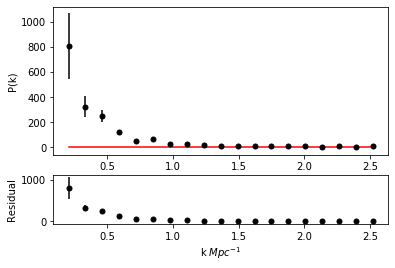

In [31]:
plot_pk(params = 1)